# An example of using python with pandas to look at Covid-19 data

Import helpful libraries  of code

First Pandas a library for working with spreadsheet data

In [1]:
import pandas as pd

matplotlib is for plotting the ```as``` renames the library

In [2]:
import matplotlib.pyplot as plt

Numpy is a powerful numeric library

Copy is a library to allow copying by value rather than simply creating reference

In [3]:
import numpy as np
import copy


allow plotting in the notebook

In [4]:
%matplotlib notebook

Use pandas to read the county data.  The Data is pulled from the New York Times [https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) as they have put it on Github

In [5]:
county = pd.read_csv('../us-counties.csv',parse_dates=['date'])


To look at the data yout can print it

In [6]:
print(county)

            date      county       state     fips  cases  deaths
0     2020-01-21   Snohomish  Washington  53061.0      1       0
1     2020-01-22   Snohomish  Washington  53061.0      1       0
2     2020-01-23   Snohomish  Washington  53061.0      1       0
3     2020-01-24        Cook    Illinois  17031.0      1       0
4     2020-01-24   Snohomish  Washington  53061.0      1       0
...          ...         ...         ...      ...    ...     ...
43280 2020-04-08    Sublette     Wyoming  56035.0      1       0
43281 2020-04-08  Sweetwater     Wyoming  56037.0      5       0
43282 2020-04-08       Teton     Wyoming  56039.0     39       0
43283 2020-04-08       Uinta     Wyoming  56041.0      2       0
43284 2020-04-08    Washakie     Wyoming  56043.0      4       0

[43285 rows x 6 columns]


or just type the variable

In [7]:
county

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
43280,2020-04-08,Sublette,Wyoming,56035.0,1,0
43281,2020-04-08,Sweetwater,Wyoming,56037.0,5,0
43282,2020-04-08,Teton,Wyoming,56039.0,39,0
43283,2020-04-08,Uinta,Wyoming,56041.0,2,0


If you want to know the names of the columns,  they are stored as dictionaries so the columns are labeled by dictionary keys. Access with the keys

In [8]:
county.keys()

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

Look at the state column and make a dataframe that is true if it is that state of Tennessee

In [9]:
tnflag=county['state']=='Tennessee'

In [10]:
tnflag

0        False
1        False
2        False
3        False
4        False
         ...  
43280    False
43281    False
43282    False
43283    False
43284    False
Name: state, Length: 43285, dtype: bool

In [11]:
Kflag=county['county']=='Knox'

Now use the logical operation "and" (&) to select only the rows with both Knox and Tennessee

In [12]:
kTown = county[Kflag & tnflag]

Now let's plot the data

first create a figure and axis object

<IPython.core.display.Javascript object>


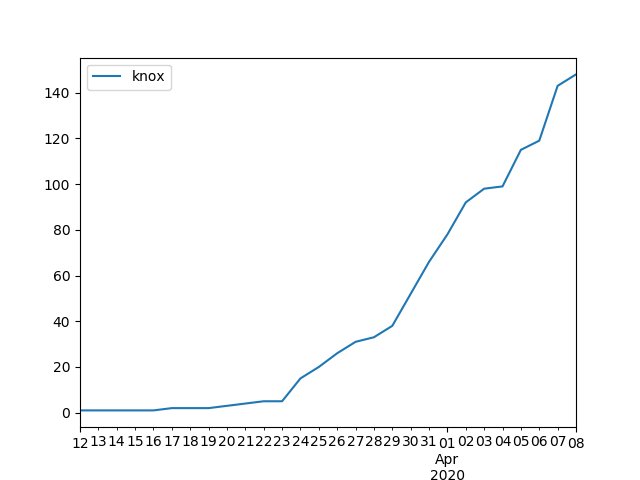

In [13]:
f,ax=plt.subplots()

Then add a plot by giving a column name for the x and y, a label to put in the legend and what axis to use when plotting the data.

In [14]:
kTown.plot(x='date',y='cases',label="knox",ax=ax)

Let's do the filtering for Chattanooga but do it all at once

In [15]:
cvegas = county[(county['county']=='Hamilton') & (county['state']=='Tennessee')]

let's make another plot at plot these together.
Also we use a dictionary to pass values to a function

<IPython.core.display.Javascript object>


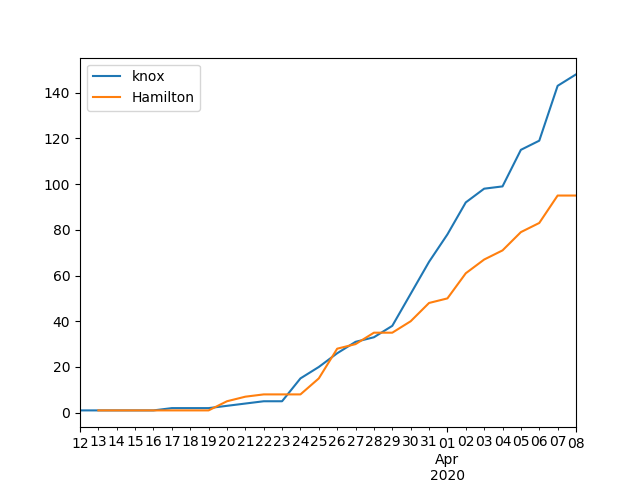

In [16]:
f2,ax2=plt.subplots()
ax_dict={'x':'date','y':'cases','ax':ax2}
kTown.plot(label="knox",**ax_dict)
cvegas.plot(label="Hamilton",**ax_dict)
ax2.legend()